# 1.	Data Wrangling

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel('Healthcare_dataset.xlsx')

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Null values detected

In [7]:
df.duplicated().sum()

1

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


One duplicate row detected

In [9]:
df= df.drop_duplicates()

In [10]:
df.shape

(302, 14)

One duplicate row dropped.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

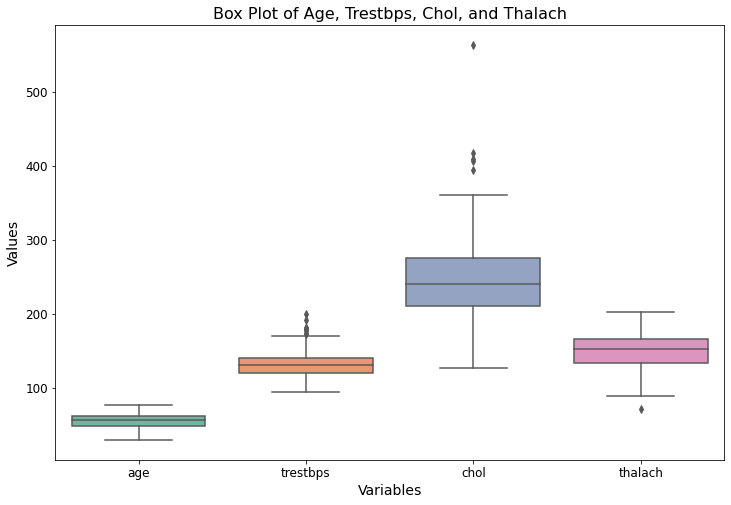

In [12]:
# Selecting the variables of interest as the spread of other variables is not enough to accurately detect outliers
selected_variables = ['age', 'trestbps', 'chol', 'thalach']
data_selected = df[selected_variables]

# Creating the box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_selected, orient="v", palette="Set2")
plt.title('Box Plot of Age, Trestbps, Chol, and Thalach', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Checked outlier in only four variables. Outliers detected in trestbps, chol and thalach.

In [13]:
# Calculate the IQR for each variable
Q1 = df[selected_variables].quantile(0.25)
Q3 = df[selected_variables].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers for each variable
outliers_removed = df[
    (df['age'] >= lower_bound['age']) & (df['age'] <= upper_bound['age']) &
    (df['trestbps'] >= lower_bound['trestbps']) & (df['trestbps'] <= upper_bound['trestbps']) &
    (df['chol'] >= lower_bound['chol']) & (df['chol'] <= upper_bound['chol']) &
    (df['thalach'] >= lower_bound['thalach']) & (df['thalach'] <= upper_bound['thalach'])
]

# Display the shape of the DataFrame before and after removing outliers
print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", outliers_removed.shape)


Shape of DataFrame before removing outliers: (302, 14)
Shape of DataFrame after removing outliers: (287, 14)


# 2. EDA

## Preliminary statistical summary of the data and the measures of central tendencies

In [14]:
outliers_removed.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.083624,0.700348,0.972125,130.003484,242.411150,0.139373,0.529617,149.675958,0.320557,1.009756,1.411150,0.717770,2.299652,0.550523
std,9.081217,0.458906,1.030610,15.434612,44.951702,0.346940,0.520551,22.717855,0.467506,1.133891,0.613041,1.007211,0.615164,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,167.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Univariate Analysis of categorical variables

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=outliers_removed

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [19]:
for feature in df.columns:
    if len(df[feature].unique()) < 10:
        print(feature)

sex
cp
fbs
restecg
exang
slope
ca
thal
target


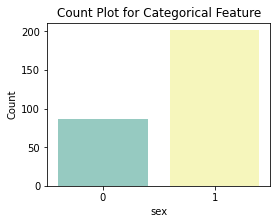

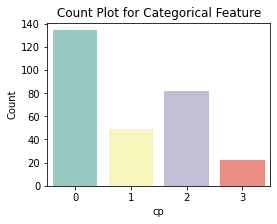

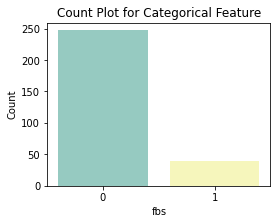

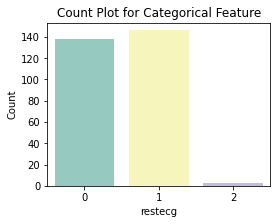

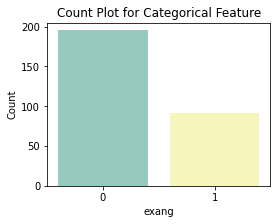

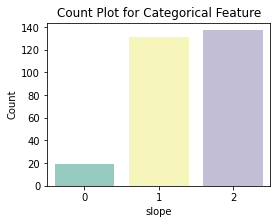

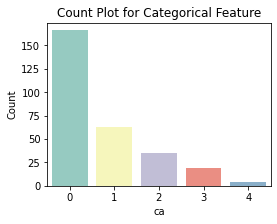

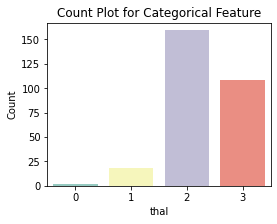

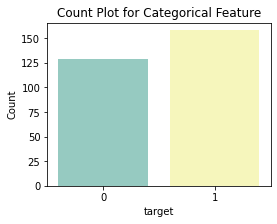

In [20]:
for feature in df.columns:
    if len(df[feature].unique()) < 10:
        plt.figure(figsize=(4, 3))
        sns.countplot(x=feature, data=df, palette='Set3')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title('Count Plot for Categorical Feature')
        plt.show()

#   Bivariate Analysis

##	Study the occurrence of CVD across the Age category

In [21]:
mean_age_by_group = df.groupby('target')['age'].mean()

print(mean_age_by_group)

target
0    56.333333
1    52.246835
Name: age, dtype: float64


Average age where patients have CVD is 52 years aprox

## Composition of all patients with respect to the Sex category

In [22]:
count_sex = df.groupby('target')['sex'].count()

print(count_sex)

target
0    129
1    158
Name: sex, dtype: int64


##### 158 male patients, 129 female patients have CVD

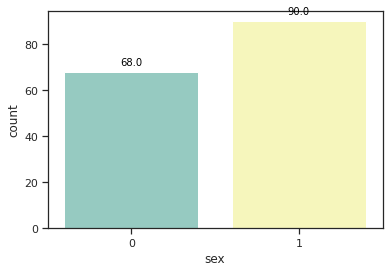

In [46]:
patient_sex = df[df['target'] == 1]

# Create the count plot
ax = sns.countplot(x='sex', data=patient_sex, palette='Set3')

# Display count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


Out of 158 CVD patients, , 68 are female and 90 are male.

## Multivariate analysis

## Detecting heart attacks based on anomalies in the resting blood pressure, Cholestrol level and Peak Exercising of a patient

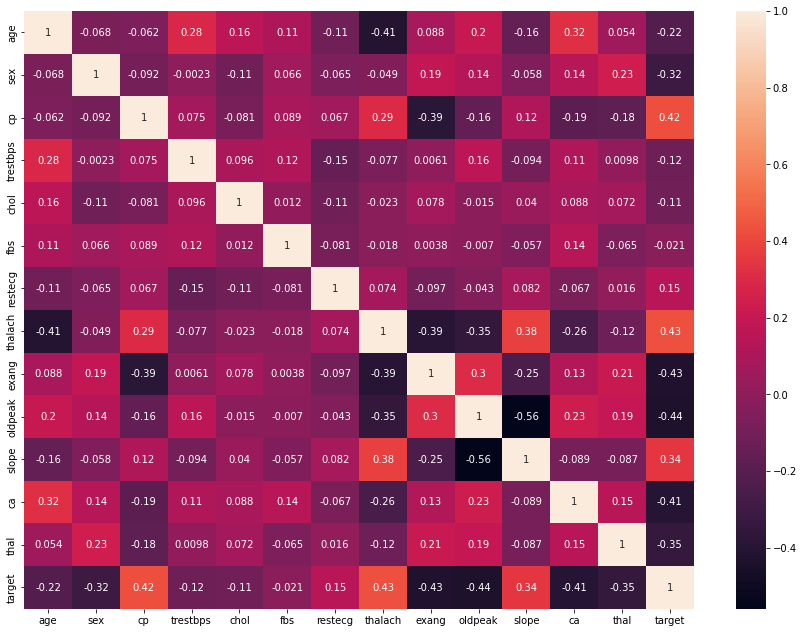

In [24]:
plt.figure(figsize=(15, 11)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

##### Correlation score of Resting BP wrt target is very low (-0.12),so the anomalies in Resting BP are not a strong indicator for heart attacks

##### Corr score of Cholestrol level wrt target is vey low (-0.11), no conclusive relationship can be established between cholestrol level and Heart Attack as per the given dataset.

##### lower mean cholestrol value for confirmed Heat Attack cases

## Checking if thalassemia is a major cause of CVD

<AxesSubplot: xlabel='thal', ylabel='count'>

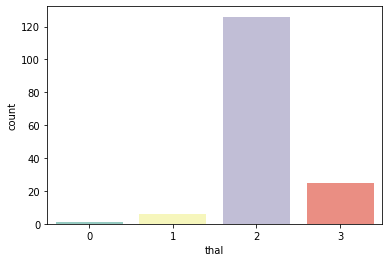

In [26]:
patient_thal = df[df['target'] == 1]
sns.countplot(x='thal', data=patient_thal, palette='Set3')

Corr score of  thal wrt target is good (-0.3), we can deduce that thal is a major cause of CVD

## Other factors determine the occurrence of CVD

In [27]:
corr_mat= df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.067799,-0.061766,0.283156,0.163933,0.105046,-0.107775,-0.407455,0.088375,0.204472,-0.155047,0.318344,0.054333,-0.224237
sex,-0.067799,1.000000,-0.091652,-0.002320,-0.106723,0.065578,-0.065177,-0.048922,0.188530,0.138685,-0.057682,0.141673,0.232480,-0.315818
cp,-0.061766,-0.091652,1.000000,0.074521,-0.080810,0.089133,0.066719,0.293362,-0.387777,-0.157746,0.117817,-0.186129,-0.179806,0.424868
trestbps,0.283156,-0.002320,0.074521,1.000000,0.096022,0.122665,-0.148194,-0.076869,0.006144,0.164722,-0.094012,0.112296,0.009833,-0.122086
chol,0.163933,-0.106723,-0.080810,0.096022,1.000000,0.012007,-0.112741,-0.022871,0.078394,-0.014519,0.039775,0.088448,0.072407,-0.105670
fbs,0.105046,0.065578,0.089133,0.122665,0.012007,1.000000,-0.081017,-0.018205,0.003831,-0.007024,-0.056651,0.142977,-0.065303,-0.020647
restecg,-0.107775,-0.065177,0.066719,-0.148194,-0.112741,-0.081017,1.000000,0.074288,-0.096618,-0.043143,0.082233,-0.067362,0.015865,0.152595
thalach,-0.407455,-0.048922,0.293362,-0.076869,-0.022871,-0.018205,0.074288,1.000000,-0.394461,-0.348637,0.384432,-0.255380,-0.119626,0.429382
exang,0.088375,0.188530,-0.387777,0.006144,0.078394,0.003831,-0.096618,-0.394461,1.000000,0.300790,-0.254073,0.125975,0.211936,-0.429975
oldpeak,0.204472,0.138685,-0.157746,0.164722,-0.014519,-0.007024,-0.043143,-0.348637,0.300790,1.000000,-0.559600,0.229587,0.191791,-0.443331


Considering variables with corr score with target > 0.2 as siggnificant, variables age,sex,cp,thalach,exang,oldpeak,slope,ca & thal impact the occurance of CVD the most.

## j.	Use a pair plot to understand the relationship between all the given variables

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

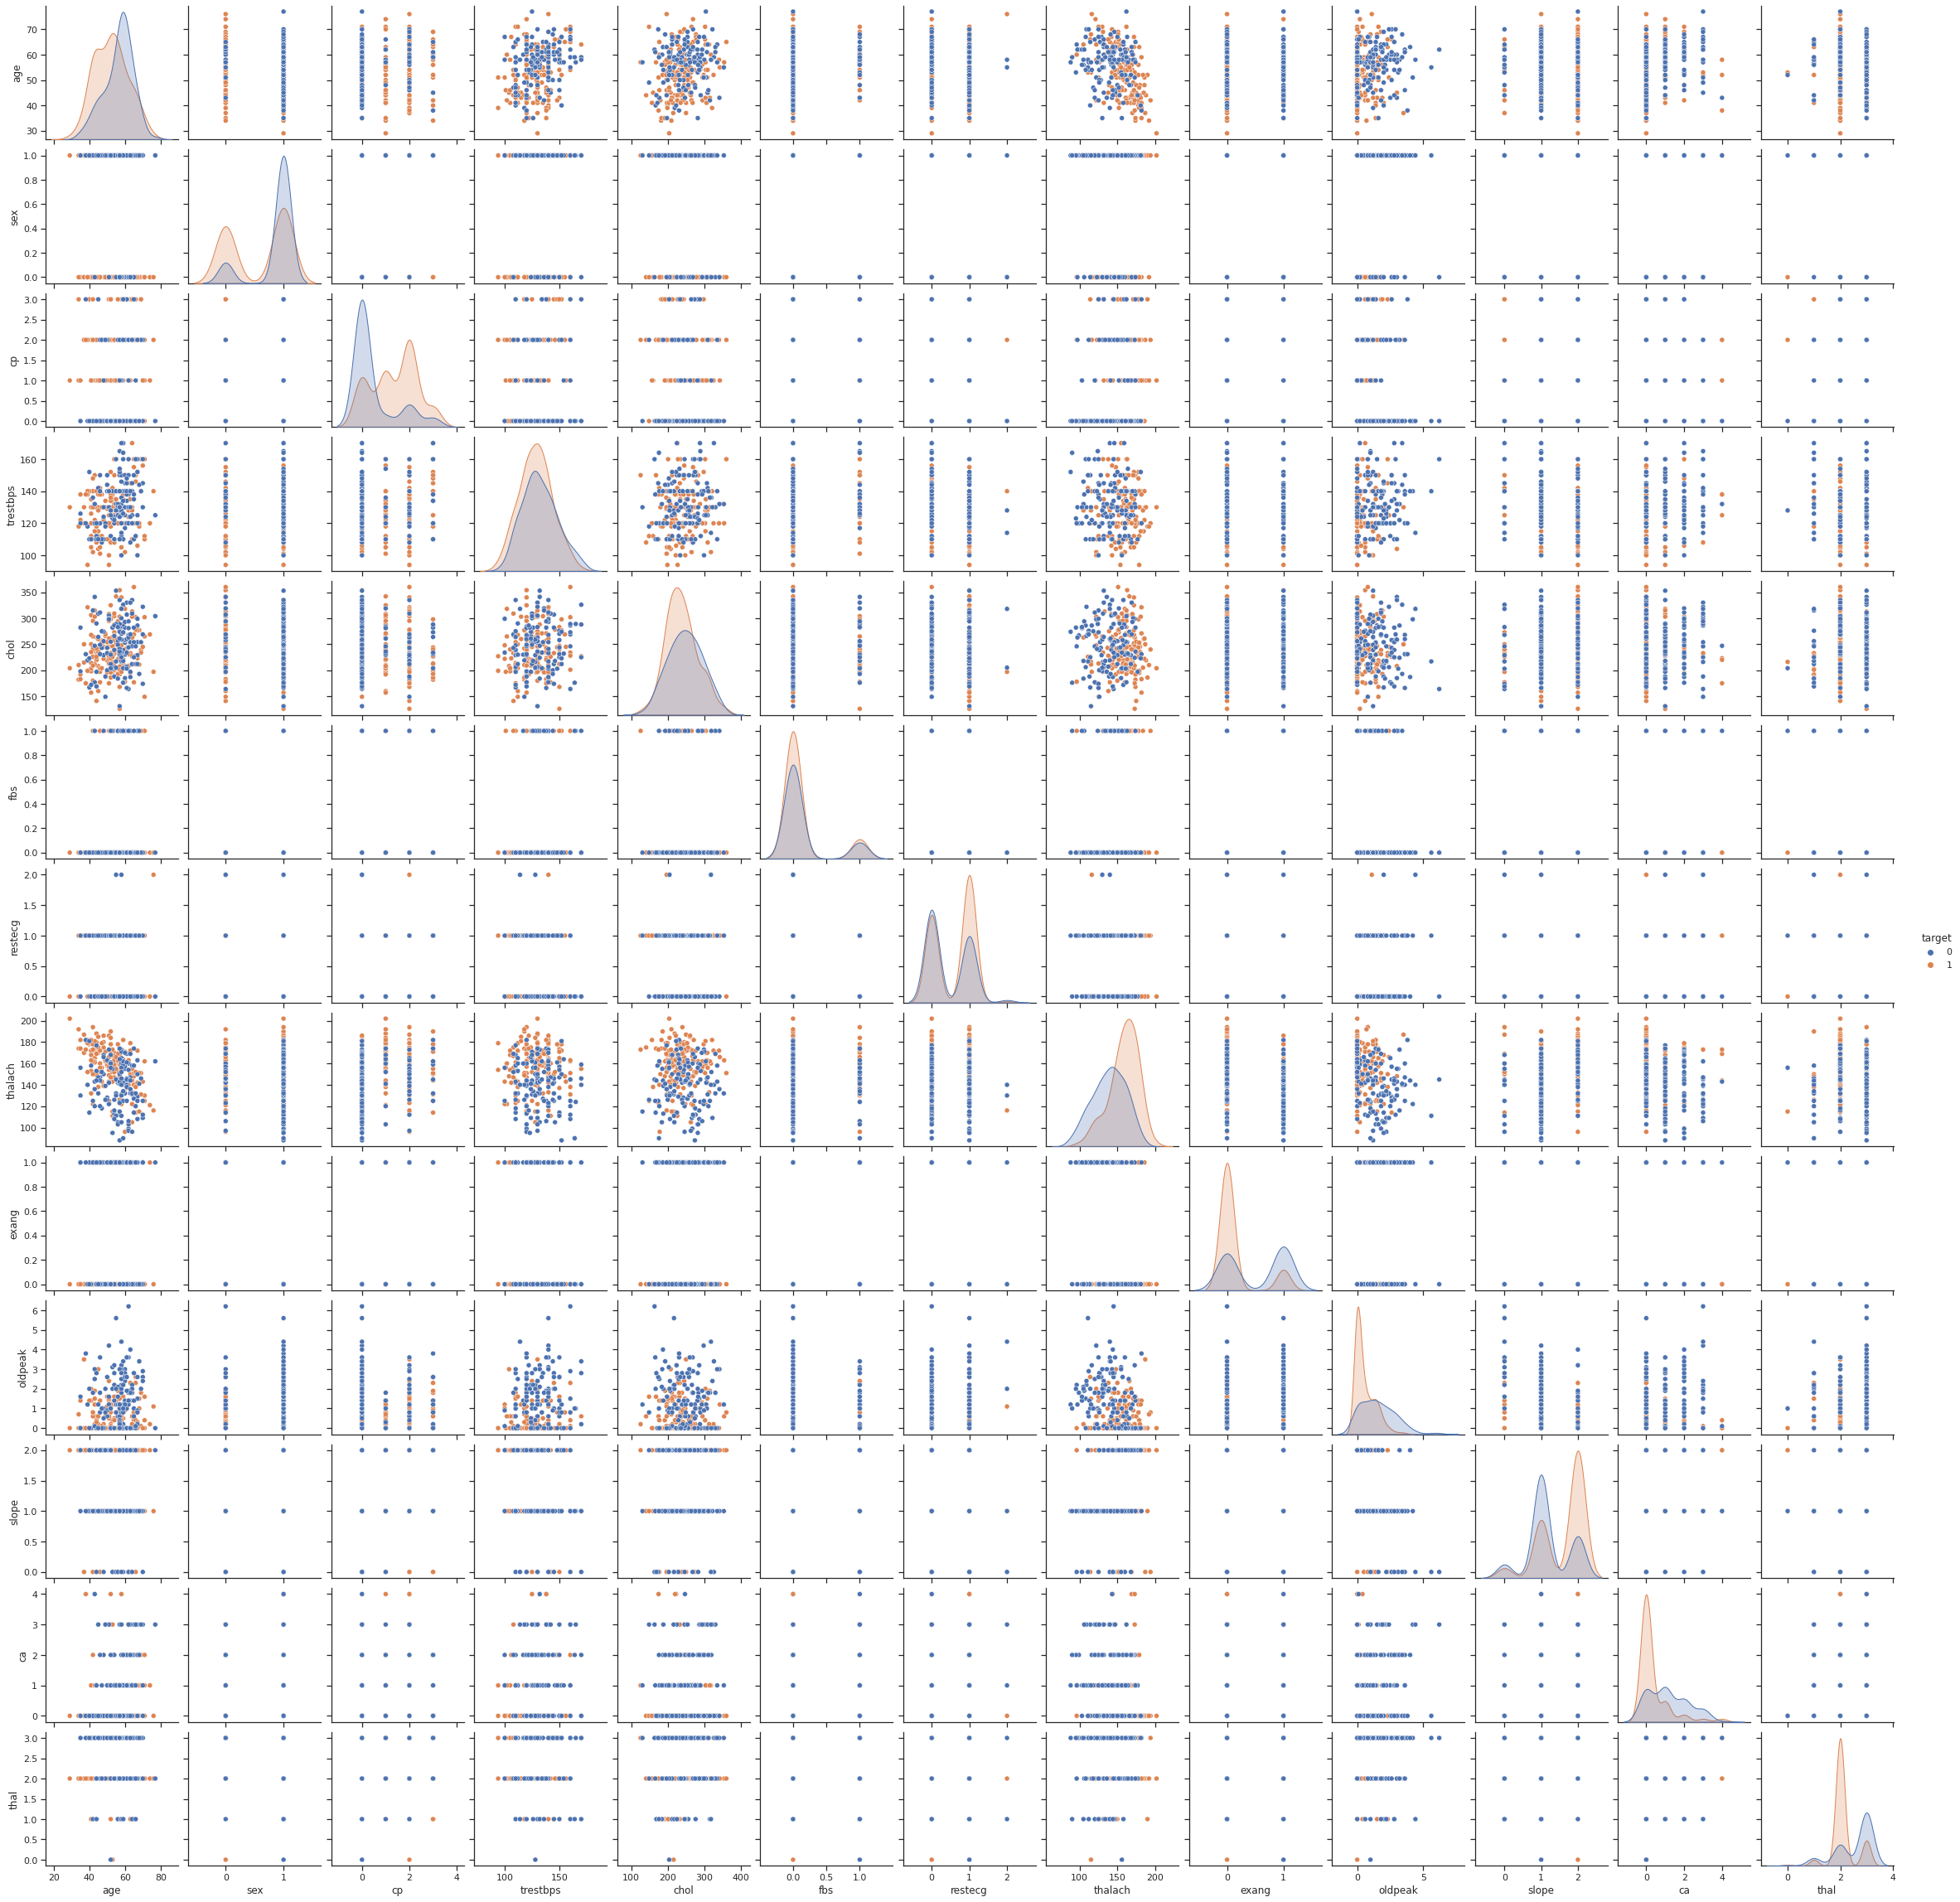

In [29]:
sns.set(style="ticks")
sns.pairplot(df,hue='target')

plt.show()

## 3. ML Models

In [30]:
X=df.drop('target', axis = 1)
y=df['target']

In [31]:
X.shape

(287, 13)

In [32]:
y.shape

(287,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=32,stratify=y)

#### (i) Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=logistic_reg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[24  8]
 [ 8 32]]


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7777777777777778
Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


#### (ii) KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [39]:
y_pred_knn=knn_clf.predict(X_test)
y_pred_knn

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0])

In [40]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

precision_knn = precision_score(y_test, y_pred_knn)

recall_knn = recall_score(y_test, y_pred_knn)

f1_knn = f1_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.6111111111111112
Precision: 0.6764705882352942
Recall: 0.575
F1 Score: 0.6216216216216216


#### (iii) SVM Model

In [41]:
from sklearn.svm import SVC

In [42]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [43]:
y_pred_svm=svm.predict(X_test)
y_pred_svm

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1])

In [44]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)

precision_svm = precision_score(y_test, y_pred_svm)

recall_svm = recall_score(y_test, y_pred_svm)

f1_svm = f1_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Accuracy: 0.5555555555555556
Precision: 0.5869565217391305
Recall: 0.675
F1 Score: 0.627906976744186


Out of three models, Logistic Regression gives best results.